# Class 1: Probability & Statistics

In this class we will review how statistics are used to summarize data, special probability distributions, their use in simple applications using Frequentist and Bayesian methods, and Monte Carlo techniques.  At the end of this class you should be able to:

- determine summary statistics for datasets and their errors
- optimally combine data
- apply probability distributions for Gaussian, Binomial and Poisson statistics
- compare the Frequentist and Bayesian frameworks for statistical analysis
- solve statistical problems using Monte Carlo techniques

## Summary statistics and their errors

A **statistic** is a quantity which summarizes our data.  Example statistics for a sample of $N$ independent estimates of a quantity are the **mean** (average value), **median** (middle value) and **standard deviation** $\sigma$ (spread).

- Mean $= \overline{x} = \frac{1}{N} \sum_i x_i$
- Median $=$ middle value when ranked
- Variance $= \sigma^2 = \frac{1}{N-1} \sum_i \left( x_i - \overline{x} \right)^2$

Here is an example of how to calculate these in python using the scipy.stats library:

_We have 10 measurements of a variable, $x_i = (7.6, 5.8, 8.0, 6.9, 7.2, 7.5, 6.4, 8.1, 6.3, 7.0)$.  Estimate the mean, variance and median of this dataset.  What are the errors in your estimates?_

In [1]:
import numpy as np
from scipy import stats
x = [7.6, 5.8, 8.0, 6.9, 7.2, 7.5, 6.4, 8.1, 6.3, 7.0] # 10 measurements of a variable
s = stats.describe(x)
mu = s.mean # mean
var = s.variance # variance
sig = np.sqrt(var) # standard deviation
median = np.median(x) # median
print('Mean =',mu)
print('Variance =',var)
print('Standard deviation =',sig)
print('Median =',median)

Mean = 7.08
Variance = 0.5662222222222222
Standard deviation = 0.7524773898411979
Median = 7.1


We can quote an error in each of these statistics:

- Error in the mean = $\sigma/\sqrt{N}$
- Error in the variance = $\sigma^2 \sqrt{2/(N-1)}$
- Error in the median = $1.25 \sigma/\sqrt{N}$

The error in the mean holds for all distributions, the other relations assume a Gaussian distribution.

In [2]:
n = len(x)
print('Error in mean =',sig/np.sqrt(n))
print('Error in variance =',var*np.sqrt(2./(n-1)))
print('Error in median =',1.25*sig/np.sqrt(n))

Error in mean = 0.23795424396766326
Error in variance = 0.2669197153278997
Error in median = 0.2974428049595791


## Optimal combination of data

Suppose we have $N$ independent estimates $x_i$ of some quantity $y$, which have varying errors $\sigma_i$.  What is our best combined estimate of $y$?

A simple average $\hat{y} = \sum_i x_i/N$ is not the optimal combination, because we want to give **more weight to the more precise estimates**.  Let's weight each estimate by $w_i$: $\hat{y} = \sum_i w_i x_i / \sum_i w_i$.

The weights which minimize the combined error are the **inverse-variance weights**, $w_i = 1/\sigma_i^2$.  In this case, the variance in the combined estimate is given by, $1/{\rm Var}(\hat{y}) = \sum_i 1/\sigma_i^2$.

Note that this approach is only useful if the errors in the data are dominated by statistical, not systematic, errors.

Here is an example:

_We have 5 measurements of a quantity: $(7.4 \pm 2.0, 6.5 \pm 1.1, 4.3 \pm 1.7, 5.5 \pm 0.8, 6.0 \pm 2.5)$.  What is the optimal estimate of this quantity, and the error in that estimate?_

In [3]:
x = np.array([7.4, 6.5, 4.3, 5.5, 6.0]) # 5 measurements of a quantity
sig = np.array([2.0, 1.1, 1.7, 0.8, 2.5]) # errors in these measurements
wei = 1./(sig**2) # weights
print('Weights =',wei)
print('Combined estimate =',np.sum(wei*x)/np.sum(wei))
print('Error in combined estimate =',1./np.sqrt(np.sum(wei)))

Weights = [0.25       0.82644628 0.34602076 1.5625     0.16      ]
Combined estimate = 5.807227819726063
Error in combined estimate = 0.5638868290446053


## Probability distributions

A **probability distribution**, $P(x)$, is a function which assigns a probability for each particular value (or range of values) of a discrete or continuous variable $x$.

- A probability distribution must be normalized, $\int_{-\infty}^\infty P(x) \, dx = 1$ (or $\sum_i P(x_i) = 1$ for a discrete variable)
- Probability in the range $[x_1, x_2]$ is $\int_{x_1}^{x_2} P(x) \, dx$

A probability distribution may be quantified by its...

- Mean, $\mu = \overline{x} = \langle x \rangle = \int_{-\infty}^\infty x \, P(x) \, dx$
- Variance $\sigma^2 = \int_{-\infty}^\infty (x - \mu)^2 \, P(x) \, dx = \langle x^2 \rangle - \langle x \rangle^2$

Certain important types of variables have known probability distributions:

- **Binomial** distribution
- **Poisson** distribution
- **Gaussian** or **Normal** distribution

## Binomial distribution

The binomial distribution applies where there is a random process with **two possible outcomes** with probabilities $p$ and $1-p$ (for example, tossing a coin).

If we have $N$ trials, and the probability of "success" in each trial is $p$, then the probability of $n$ successes is:

$P_{Binomial}(n) = \frac{N!}{n! (N-n)!} p^n (1-p)^{N-n}$

The mean and variance of this distribution are $\overline{n} = p N$, ${\rm Var}(n) = N p (1-p)$.

Here is an example Binomial distribution for $N = 10$ and $p = 0.2$ (you can change these choices in the notebook of course!):

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # number of trials
p = 0.2 # probability of success in each trial
x = np.arange(n+1) # number of successes
y = stats.binom.pmf(x,n,p) # generate Binomial probability function
mu = n*p # mean of distribution
xmin,xmax = 0.,float(n)
ymin,ymax = 0.,0.4
plt.plot(x,y,marker='o',markersize=5,color='black')
plt.plot([mu,mu],[ymin,ymax],color='black',linestyle='dotted')
plt.xlabel(r'$n$')
plt.ylabel(r'$P_{\rm Binomial}(n)$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

(0.0, 0.4)

## Poisson distribution

The Poisson distribution applies to a **discrete random process where we are counting** a quantity in a fixed interval (of space or time).  Example: radioactive decay, photons arriving at a CCD.  If the mean number of events expected in some interval is $\mu$, the probability of observing $n$ events is:

$P_{\rm Poisson}(n) = \frac{\mu^n \, e^{-\mu}}{n!}$

The mean and variance of this distribution are equal, $\overline{n} = {\rm Var}(n) = \mu$.

The variance of the distribution allows us to set the **Poisson error** for a counting experiment: if a bin contains $N$ events, by assuming the mean count is the observed count we can place an error:

Count = $N \pm \sqrt{N}$

Here is an example Poisson distribution for $\mu = 5$:

(0.0, 0.25)

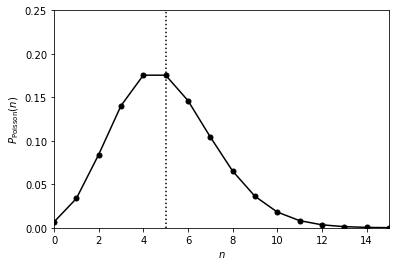

In [5]:
mu = 5. # mean number of events expected
nmax = 15 # maximum observed number of events to consider
x = np.arange(nmax+1) # variable for number of events
y = stats.poisson.pmf(x,mu) # generate Poisson probability function
xmin,xmax = 0.,float(nmax)
ymin,ymax = 0.,0.25
plt.plot(x,y,marker='o',markersize=5,color='black')
plt.plot([mu,mu],[ymin,ymax],color='black',linestyle='dotted')
plt.xlabel(r'$n$')
plt.ylabel(r'$P_{\rm Poisson}(n)$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

## Gaussian distribution

The **Gaussian (or "normal") probability distribution** for a variable $x$, with mean $\mu$ and standard deviation $\sigma$, is:

$P_{\rm Gaussian}(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2}$

The Gaussian distribution is an ubiquitous and important probability distribution because:

- It is the **high-$N$ limit** for the Binomial and Poisson distributions
- The **central limit theorem** says that if we average together variables drawn many times from any probability distribution, the resulting average will follow a Gaussian distribution (see example below!)

Here is an example Gaussian distribution for $\mu = 2$ and $\sigma = 0.5$, marking in intervals of standard deviations:

(0.0, 1.0)

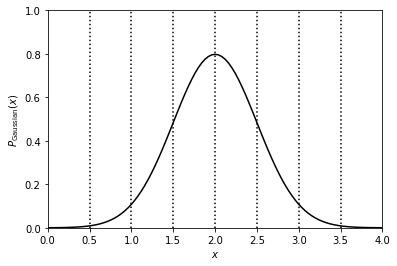

In [6]:
mu = 2. # mean
sig = 0.5 # standard deviation
xmin,xmax,nx = 0.,4.,101 # range of variable
x = np.linspace(xmin,xmax,nx) # values of variable
y = stats.norm.pdf(x,mu,sig) # generate Gaussian probability function
ymin,ymax = 0.,1.
plt.plot(x,y,color='black')
for i in range(-3,4):
  x1 = mu + i*sig
  plt.plot([x1,x1],[ymin,ymax],color='black',linestyle='dotted')
plt.xlabel(r'$x$')
plt.ylabel(r'$P_{\rm Gaussian}(x)$')
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

The Gaussian distribution is often used as shorthand for the **"confidence" of a statement**.  For example, the probability contained within $\pm 1,2,3$ standard deviations is $(68.27, 95.45, 99.73)\%$.  If a statement is true with "3$\sigma$ confidence", it implies it is true with a probability of $99.73\%$.  The following snippet of code generates this for a general number of standard deviations.

In [7]:
nsigma = 2.2 # number of standard deviations
prob = stats.norm.cdf(nsigma) # 1-tailed probability integrated up to this location
prob = 1. - 2.*(1.-prob) # add in other tail!
print('Probability =',prob)

Probability = 0.9721931049730028


## Frequentist and Bayesian frameworks

It is important to understand different methods of using probability in science.  We describe them here in a practical way.

First let's introduce the concept of **conditional probability**.  $P(A|B)$ means "the probability of $A$ on the condition that $B$ has occurred".

**Frequentist statistics** assign probabilities to a measurement, i.e. they determine $P(data|model)$.

- We are defining probability by imagining a series of hypothetical experiments, repeatedly sampling the population, which have not actually taken place
- Our philosophy of science is to attempt to "rule out" or falsify models, if $P(data|model)$ is too small

**Bayesian statistics** assign probabilities to a model, i.e. they give us tools for calculating $P(model|data)$.

- We update the model probabilities in the light of each new dataset
- Our philosophy of science is we do not "rule out" models, just determine their relative probabilities

Bayesian statistics uses Bayes' theorem to derive $P(model|data) = P(data|model) \, P(model) / P(data)$.

## Worked example

The following is a worked example solved by both frequentist and Bayesian methods.

_I observe 100 galaxies, 30 of which are AGN.  What is the best estimate of the AGN fraction and its error?_

### Solution by frequentist approach

- Estimate the AGN fraction as $p = N_{AGN}/N_{total} = 30/100 = 0.3$
- There are 2 possible outcomes ("AGN" or "not an AGN") so the binomial distribution applies
- Estimate the error in $N_{AGN}$ as the standard deviation of the binomial distribution, $\sqrt{p(1-p)N_{total}} = 4.6$.  Hence, the error in $p$ is $4.6/100 = 0.046$
- Answer: $p = 0.3 \pm 0.046$

### Solution by Bayesian approach

- Use Bayes' theorem, $P(p|D) \propto P(D|p) \, P(p)$
- $P(p|D)$ is the probability distribution of $p$ given the data $D$, which we are aiming to determine
- $P(D|p)$ is the probability of the data for a given value of $p$, which is given by the binomial distribution as $P_{\rm Binomial}(n=30|N=100,p)$
- $P(p)$ is the prior in $p$, which we take as a uniform distribution between $p=0$ and $p=1$.

Here is the resulting calculation of $P(p|D)$:

Text(0, 0.5, '$P(p|D)$')

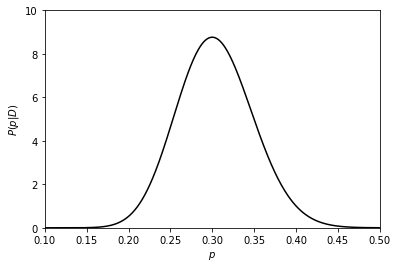

In [8]:
# Observed number of AGN
n = 30
# Total number of objects
nmax = 100
# Range of values for the AGN fraction to evaluate
# This is the same as the width of the uniform prior in P(frac)
xmin,xmax,nx = 0.1,0.5,400
# Array of values for the AGN fraction
dx = (xmax-xmin)/nx
x = np.linspace(xmin+0.5*dx,xmax-0.5*dx,nx)
# Compute the (unnormalised) probability of each AGN fraction value
# This calculation uses Bayes' theorem: P(frac|n) \propto P(n|frac) P(frac)
# P(n|frac) is determined using the Binomial probability distribution
# P(frac) is the prior, which we take as uniform and therefore do not include in the calculation
prob = np.empty(nx)
for i in range(nx):
  prob[i] = stats.binom.pmf(n,nmax,x[i])
# Normalise the probability distribution.  This ensures that \int P(x) dx = 1
# Expressing the integral as a sum, we are finding N such that N \sum P(x) dx = 1, or N = 1/\sum P(x) dx
prob /= np.sum(prob)*dx
# Plot the normalised posterior probability distribution for P(frac|n)
ymax = 10.
plt.plot(x,prob,color='black')
plt.xlim(xmin,xmax)
plt.ylim(0.,ymax)
plt.xlabel(r'$p$')
plt.ylabel(r'$P(p|D)$')

We could then quote our answer as the mean and standard deviation of this distribution:

In [9]:
# These calculations work because the probability distribution is already normalised such that \int P(x) dx = 1
x1 = np.sum(x*prob*dx) # determine <x> by evaluating \int x P(x) dx = \sum x P(x) dx
x2 = np.sum((x**2)*prob*dx) # determine <x^2> by evaluating \int x^2 P(x) dx = \sum x^2 P(x) dx
mu = x1 # mean = <x>
sig = np.sqrt(x2 - x1**2) # standard deviation = \sqrt(<x^2> - <x>^2)
print('Mean =',mu)
print('Standard deviation =',sig)

Mean = 0.3039158356556867
Standard deviation = 0.04530760743511314


## Activity

Consider the following question:

_A survey of area $A = 1$ deg$^2$ finds $N=20$ quasars.  What is the number of quasars per sq degree, $\sigma$?_

Solve this question using both a Frequentist and a Bayesian approach.

## Monte Carlo simulations

A **Monte Carlo simulation** is a computer model of an experiment, in which many random realizations of the results are created and analysed like the real data.

This powerful technique allows determination of errors from the **distribution of results over the realizations**.

## Activity: Monte Carlo methods

Solve the following problem by Monte Carlo methods: I'm dealt 5 playing cards from a normal deck (i.e. 13 different values in 4 suits).  What is the probability of obtaining "3 of a kind" (i.e. 3 of my 5 cards having the same value?)

## Activity: central limit theorem

Write a code that draws $n$ values of $x$ from an exponential distribution $P(x) \propto e^{-x}$ (where $0 < x < \infty$) and computes their arithmetic mean $\mu$.  Repeat this process $m$ times, and plot the probability distribution of $\mu$ across the $m$ realisations.  Run this experiment for values $n = 1,2,5,10,20,50$.

Hint: to do a single draw, select a uniform random number $y$ in the range $0 < y < 1$, then $x = -\ln{y}$.